In [43]:
import random
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import copy, math
from sklearn.metrics import accuracy_score

In [44]:
df = pd.read_csv('WaterQuality.csv')
safe = df[df['is_safe']==1]
notsafe = df[df['is_safe']==0]
notsafe = notsafe.sample(n=len(safe), random_state=101)
df = pd.concat([safe,notsafe],axis=0)
df=(df-df.min())/(df.max()-df.min())
df['is_safe'] = df['is_safe'].astype(int)
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.329341,0.304931,0.038835,0.588843,0.053846,0.040416,0.922222,0.085427,0.033333,0.20,...,0.270,0.814177,0.391003,0.7,0.631905,0.850690,0.8,0.68,0.222222,1
1,0.463074,0.710164,0.009709,0.683884,0.015385,0.609700,0.755556,0.331658,0.600000,0.65,...,0.500,0.101772,0.667820,0.3,0.540007,0.402760,0.8,0.54,0.555556,1
3,0.271457,0.380409,0.038835,0.611570,0.007692,0.834873,0.033333,0.834171,0.720000,0.71,...,0.080,0.071392,0.446367,0.4,0.152662,0.215809,0.2,0.90,0.555556,1
4,0.183633,0.816505,0.029126,0.041322,0.046154,0.308314,0.766667,0.286432,0.406667,0.13,...,0.585,0.341266,0.384083,0.3,0.282893,0.302384,0.2,0.12,0.222222,1
5,0.187625,0.485743,0.029126,0.595041,0.023077,0.092379,0.477778,0.693467,0.073333,0.67,...,0.675,0.493671,0.653979,0.6,0.454804,0.680050,0.8,0.38,0.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,0.762475,0.575646,0.786408,0.770661,0.692308,0.282910,0.877778,0.864322,0.486667,0.81,...,0.775,0.533165,0.667820,0.1,0.787580,0.593476,0.7,0.98,1.000000,0
7386,0.005988,0.062731,0.009709,0.179752,0.384615,0.010393,0.066667,0.432161,0.073333,0.85,...,0.505,0.350380,0.377163,0.8,0.157516,0.062735,0.4,0.04,0.666667,0
7875,0.009980,0.003690,0.067961,0.214876,0.538462,0.087760,0.044444,0.015075,0.913333,0.00,...,0.805,0.148354,0.802768,0.9,0.044191,0.225847,0.4,0.10,0.111111,0
4500,0.009980,0.870178,0.058252,0.173554,0.461538,0.017321,0.033333,0.020101,0.193333,0.00,...,0.975,0.418734,0.204152,0.7,0.055239,0.393977,0.6,0.20,0.222222,0


In [45]:
X = df.drop(['is_safe'], axis=1).values
Y = df['is_safe'].values

In [46]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [47]:
def compute_cost_neural(X, y, v1, v2, w1, w2):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        cost += ((sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i])))))-y[i])**2
    cost = cost / m
    return cost

In [48]:
def compute_w_gradient_neural(X, y, v1, v2, w1, w2, ind): 
    m = X.shape[0]
    dj_dw = 0 
    for i in range(m):
        sim_term = 2*((sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i])))))-y[i])*(sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i])))))*(1-(sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i]))))))
        if (ind == 1):
            dj_dw += sim_term*sigmoid(np.dot(v1,X[i]))
        elif (ind == 2):
            dj_dw += sim_term*sigmoid(np.dot(v2,X[i]))
    dj_dw = dj_dw/m
    return dj_dw

In [49]:
def compute_v_gradient_neural(X, y, v1, v2, w1, w2, ind): 
    m = X.shape[0]
    dj_dv = 0 
    for i in range(m):
        sim_term = 2*((sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i])))))-y[i])*(sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i])))))*(1-(sigmoid((w1*sigmoid(np.dot(v1,X[i])))+(w2*sigmoid(np.dot(v2,X[i]))))))
        if (ind == 1):
            dj_dv += sim_term*w1*sigmoid(np.dot(v1,X[i]))*(1-sigmoid(np.dot(v1,X[i])))*X[i]
        elif (ind == 2):
            dj_dv += sim_term*w2*sigmoid(np.dot(v2,X[i]))*(1-sigmoid(np.dot(v2,X[i])))*X[i]
    dj_dv = dj_dv/m
    return dj_dv

In [50]:
def gradient_descent(X, y, v1, v2, w1, w2, alpha, num_iters): 
    J_history = []
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dv1 = compute_v_gradient_neural(X, y, v1, v2, w1, w2, 1)
        dj_dv2 = compute_v_gradient_neural(X, y, v1, v2, w1, w2, 2)
        dj_dw1 = compute_w_gradient_neural(X, y, v1, v2, w1, w2, 1)
        dj_dw2 = compute_w_gradient_neural(X, y, v1, v2, w1, w2, 2)
        v1 = v1 - alpha * dj_dv1   
        v2 = v2 - alpha * dj_dv2   
        w1 = w1 - alpha * dj_dw1   
        w2 = w2 - alpha * dj_dw2   
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost_neural(X, y, v1, v2, w1, w2))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return v1, v2, w1, w2, J_history         #return final w and J history for graphing

In [55]:
v1_tmp = np.zeros_like(X[0])
v2_tmp = np.zeros_like(X[0])
w1_tmp = 0
w2_tmp = 0
alpha = 0.01
iters = 10000
v1_out, v2_out, w1_out, w2_out, J = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.25   
Iteration 1000: Cost 0.25   
Iteration 2000: Cost 0.25   
Iteration 3000: Cost 0.25   
Iteration 4000: Cost 0.25   
Iteration 5000: Cost 0.25   
Iteration 6000: Cost 0.25   
Iteration 7000: Cost 0.25   
Iteration 8000: Cost 0.25   
Iteration 9000: Cost 0.25   

Updated Parameters:
v1:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
v2:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
w1:0.0
w2:0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


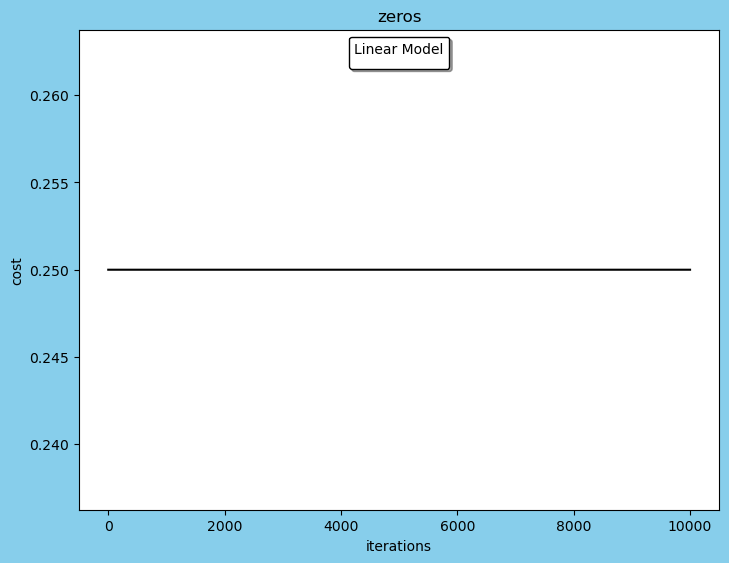

In [56]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='zeros',facecolor='w')
plt.plot(np.arange(10000),J,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [57]:
v1_tmp = np.random.rand(X.shape[1])
v2_tmp = np.random.rand(X.shape[1])
w1_tmp = random.random()
w2_tmp = random.random()
alpha = 0.01
iters = 10000
v1_out, v2_out, w1_out, w2_out, J2 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.30975897617312365   
Iteration 1000: Cost 0.25086156171305996   
Iteration 2000: Cost 0.2498851217385981   
Iteration 3000: Cost 0.249865622097746   
Iteration 4000: Cost 0.24985469117796333   
Iteration 5000: Cost 0.2498436490989391   
Iteration 6000: Cost 0.24983239586939962   
Iteration 7000: Cost 0.24982090863279885   
Iteration 8000: Cost 0.24980916455064575   
Iteration 9000: Cost 0.24979713999598527   

Updated Parameters:
v1:[0.57683863 0.23568962 0.31844287 0.48823074 0.45149308 0.14176992
 0.53352204 0.65584489 0.61626909 0.09220111 0.93227134 0.83894606
 0.2158367  0.91766914 0.12470877 0.11797455 0.17551233 0.42902876
 0.6379689  0.86248143]
v2:[0.63711492 0.66125246 0.85923612 0.70918838 0.63474273 0.80320864
 0.94626632 0.0018036  0.42067931 0.71380707 0.75905046 0.87325588
 0.22200048 0.27887243 0.7040616  0.35954842 0.89583031 0.52804125
 0.74529916 0.45967209]
w1:-0.39739354751386036
w2:0.3973122621623835


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


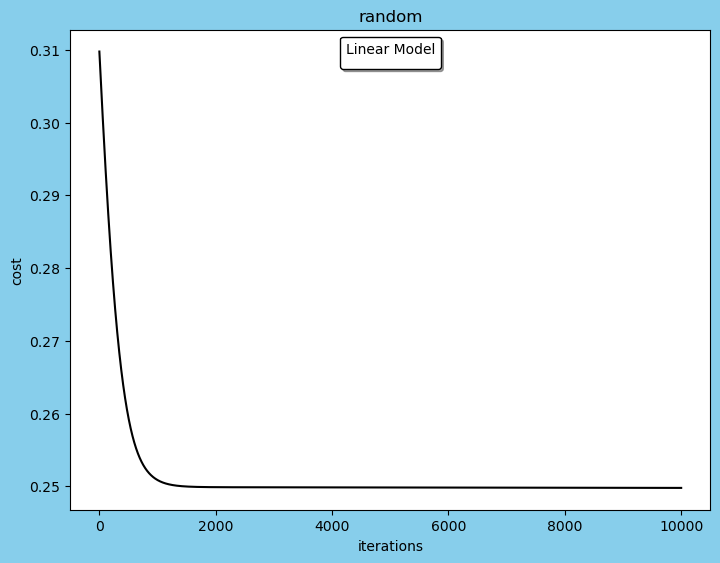

In [58]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='random',facecolor='w')
plt.plot(np.arange(10000),J2,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

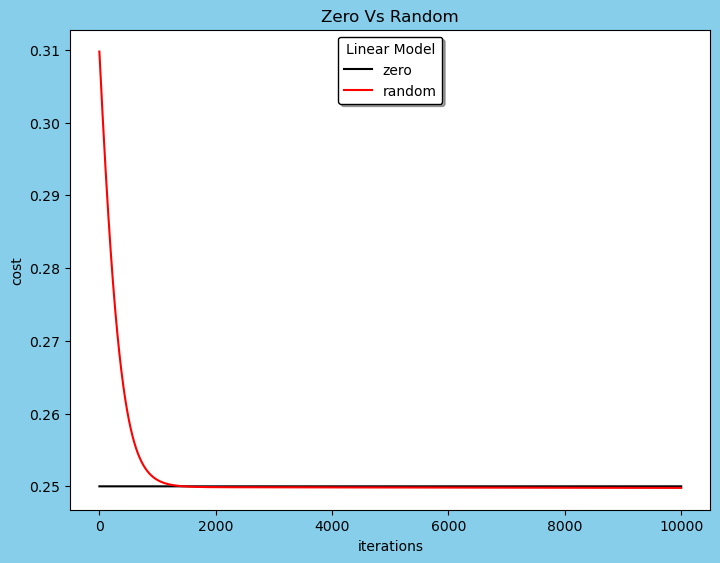

In [59]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='Zero Vs Random',facecolor='w')
plt.plot(np.arange(10000),J,color='black')
plt.plot(np.arange(10000),J2,color='r')
plt.legend(['zero','random'],facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [60]:
alpha = 0.1
iters = 10000
v1_out, v2_out, w1_out, w2_out, J1 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.3083007906543879   
Iteration 1000: Cost 0.24978470389099428   
Iteration 2000: Cost 0.2496382788243932   
Iteration 3000: Cost 0.2494213776393284   
Iteration 4000: Cost 0.2490574943506714   
Iteration 5000: Cost 0.2483354271499785   
Iteration 6000: Cost 0.2463856581404917   
Iteration 7000: Cost 0.23600146470702382   
Iteration 8000: Cost 0.20706926076225035   
Iteration 9000: Cost 0.19024435658148875   

Updated Parameters:
v1:[-0.24743957 -0.03752648  0.55001969  0.19568197  0.80998877 -0.42976282
  0.03478722  0.33820904  0.15872034  0.11063624  1.16225738  0.67096864
  0.12435261  0.67759922 -0.04082356 -0.15376017 -0.06626404  0.18781905
  0.42403254  0.70785583]
v2:[ 2.25331857  0.05526555 -0.32624903  0.39839392 -1.44264816  1.39454099
  1.32112205 -0.32117036  0.13952243  0.03062714 -0.5817373  -0.10897195
 -0.65179984 -0.42871833 -0.29732693  0.19461539  0.23240529 -0.27774086
  0.23136671 -0.63364308]
w1:-1.9690691109827758
w2:3.299322431839079


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


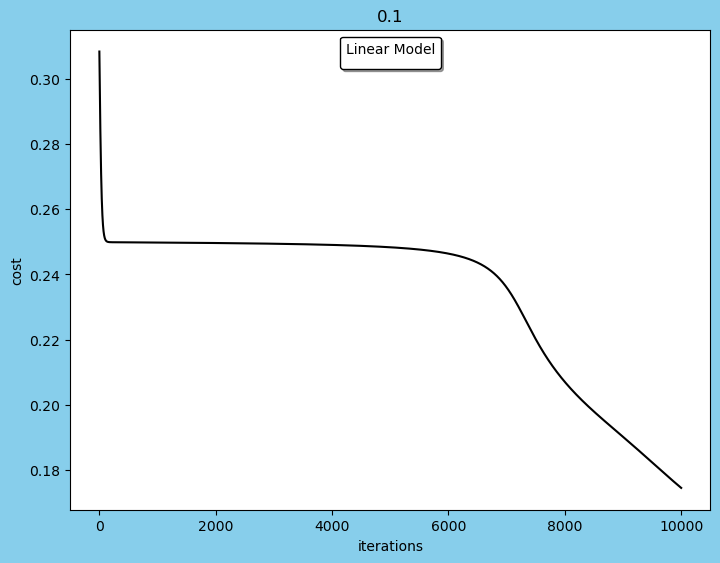

In [61]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.1',facecolor='w')
plt.plot(np.arange(10000),J1,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [62]:
alpha = 0.05
iters = 10000
v1_out, v2_out, w1_out, w2_out, J2 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.30911005355864135   
Iteration 1000: Cost 0.24984360847105444   
Iteration 2000: Cost 0.2497847630898253   
Iteration 3000: Cost 0.24971759416993758   
Iteration 4000: Cost 0.2496383618609299   
Iteration 5000: Cost 0.24954205041924393   
Iteration 6000: Cost 0.24942150021061807   
Iteration 7000: Cost 0.24926586916654409   
Iteration 8000: Cost 0.2490576869293251   
Iteration 9000: Cost 0.24876671412924242   

Updated Parameters:
v1:[ 0.42449982  0.24056001  0.34534526  0.43732019  0.58138074 -0.0022666
  0.41577115  0.65153616  0.62398545  0.12638366  1.02502896  0.90503489
  0.2902171   0.9190282   0.18240574  0.03093381  0.1392364   0.47281665
  0.58358708  0.91051943]
v2:[ 0.72653723  0.5809554   0.83647387  0.69702463  0.46327053  0.88819061
  1.00210576 -0.11602983  0.28526512  0.6242989   0.62056101  0.69120815
  0.03702904  0.15701157  0.55179678  0.40327433  0.87244281  0.37780334
  0.75903427  0.31374386]
w1:-0.6483897890301141
w2:0.6609280416592217


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


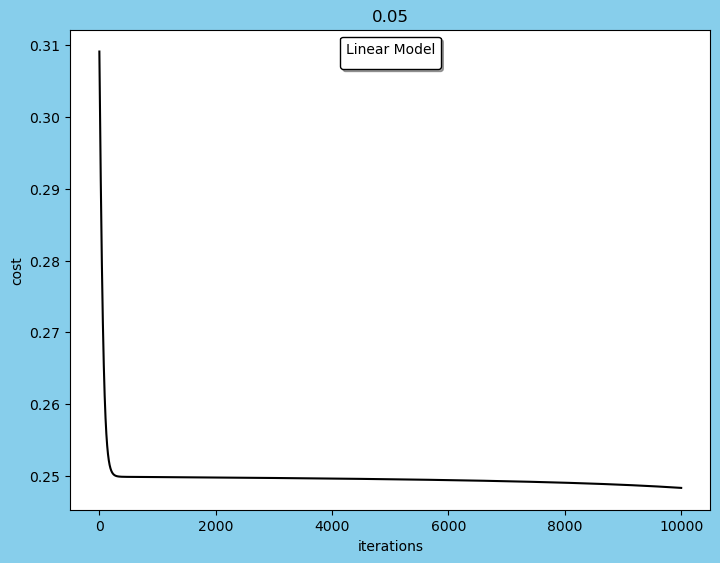

In [63]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.05',facecolor='w')
plt.plot(np.arange(10000),J2,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [64]:
alpha = 0.01
iters = 10000
v1_out, v2_out, w1_out, w2_out, J3 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.30975897617312365   
Iteration 1000: Cost 0.25086156171305996   
Iteration 2000: Cost 0.2498851217385981   
Iteration 3000: Cost 0.249865622097746   
Iteration 4000: Cost 0.24985469117796333   
Iteration 5000: Cost 0.2498436490989391   
Iteration 6000: Cost 0.24983239586939962   
Iteration 7000: Cost 0.24982090863279885   
Iteration 8000: Cost 0.24980916455064575   
Iteration 9000: Cost 0.24979713999598527   

Updated Parameters:
v1:[0.57683863 0.23568962 0.31844287 0.48823074 0.45149308 0.14176992
 0.53352204 0.65584489 0.61626909 0.09220111 0.93227134 0.83894606
 0.2158367  0.91766914 0.12470877 0.11797455 0.17551233 0.42902876
 0.6379689  0.86248143]
v2:[0.63711492 0.66125246 0.85923612 0.70918838 0.63474273 0.80320864
 0.94626632 0.0018036  0.42067931 0.71380707 0.75905046 0.87325588
 0.22200048 0.27887243 0.7040616  0.35954842 0.89583031 0.52804125
 0.74529916 0.45967209]
w1:-0.39739354751386036
w2:0.3973122621623835


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


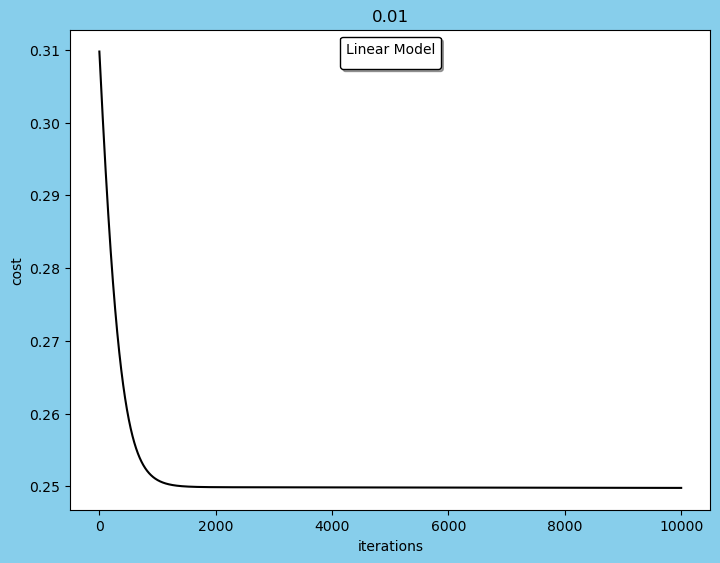

In [65]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.01',facecolor='w')
plt.plot(np.arange(10000),J3,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [66]:
alpha = 0.005
iters = 10000
v1_out, v2_out, w1_out, w2_out, J4 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.30984018375031785   
Iteration 1000: Cost 0.25945241740166114   
Iteration 2000: Cost 0.2508658810502269   
Iteration 3000: Cost 0.24997550384642314   
Iteration 4000: Cost 0.24988519075679588   
Iteration 5000: Cost 0.24987176110703524   
Iteration 6000: Cost 0.24986562769427986   
Iteration 7000: Cost 0.24986015105430598   
Iteration 8000: Cost 0.24985469611844027   
Iteration 9000: Cost 0.2498491999678869   

Updated Parameters:
v1:[0.59128892 0.23274498 0.31549279 0.49193246 0.43639371 0.15544824
 0.54437239 0.65383963 0.61241705 0.08727803 0.92115105 0.82895997
 0.20508009 0.91491289 0.1156894  0.12595912 0.17734282 0.42161289
 0.6422958  0.85489959]
v2:[0.63001802 0.66603414 0.86079245 0.70939743 0.64657156 0.79629659
 0.94163874 0.00953457 0.42929508 0.71985353 0.7687001  0.88548291
 0.23457201 0.28707568 0.71410885 0.35573198 0.89682124 0.53797772
 0.74379857 0.4691684 ]
w1:-0.3860638327803417
w2:0.38558756368601166


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


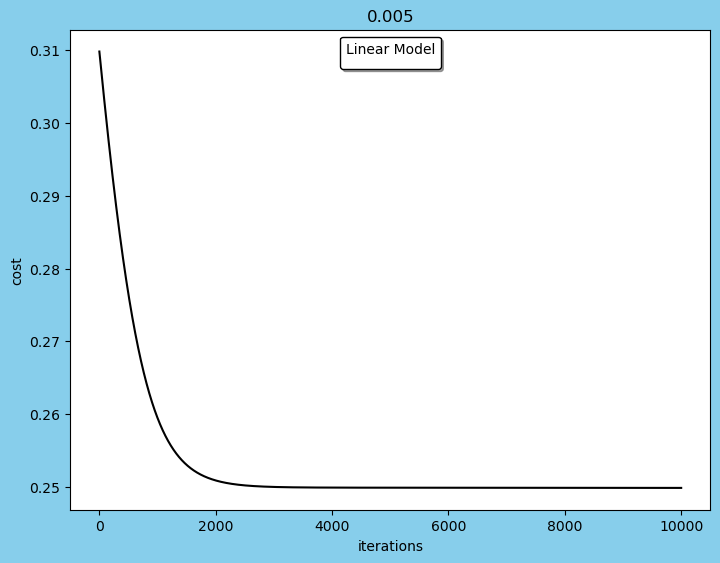

In [67]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.005',facecolor='w')
plt.plot(np.arange(10000),J4,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [68]:
alpha = 0.001
iters = 10000
v1_out, v2_out, w1_out, w2_out, J5 = gradient_descent(X, Y, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.3099051643854489   
Iteration 1000: Cost 0.29463466543576877   
Iteration 2000: Cost 0.2818332805442203   
Iteration 3000: Cost 0.2718592991952111   
Iteration 4000: Cost 0.2645601247736565   
Iteration 5000: Cost 0.25947471608764305   
Iteration 6000: Cost 0.256056980948076   
Iteration 7000: Cost 0.2538168274196552   
Iteration 8000: Cost 0.25237291319439487   
Iteration 9000: Cost 0.25145229766423666   

Updated Parameters:
v1:[0.602303   0.22975559 0.31309189 0.49439678 0.42415121 0.16578834
 0.55249064 0.65171292 0.60861613 0.08309577 0.91213999 0.82039817
 0.19592701 0.91210137 0.10784837 0.13187252 0.17826418 0.41507127
 0.64532932 0.84830391]
v2:[0.62456251 0.66982595 0.86201407 0.7096157  0.65575077 0.79099716
 0.93811773 0.01556229 0.43605559 0.72453875 0.77614854 0.89501473
 0.24437246 0.29351492 0.72196795 0.35282821 0.8976523  0.54575616
 0.74269291 0.47659015]
w1:-0.31521843713744435
w2:0.44394225819079447


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


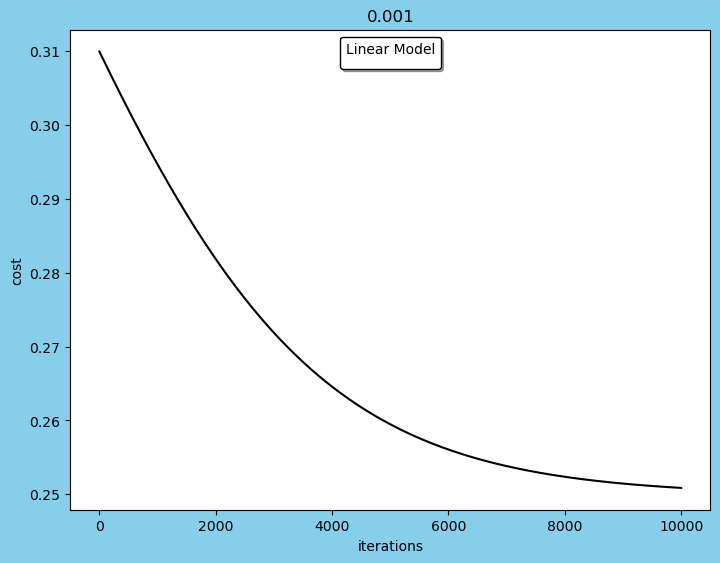

In [69]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='0.001',facecolor='w')
plt.plot(np.arange(10000),J5,color='black')
plt.legend(facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

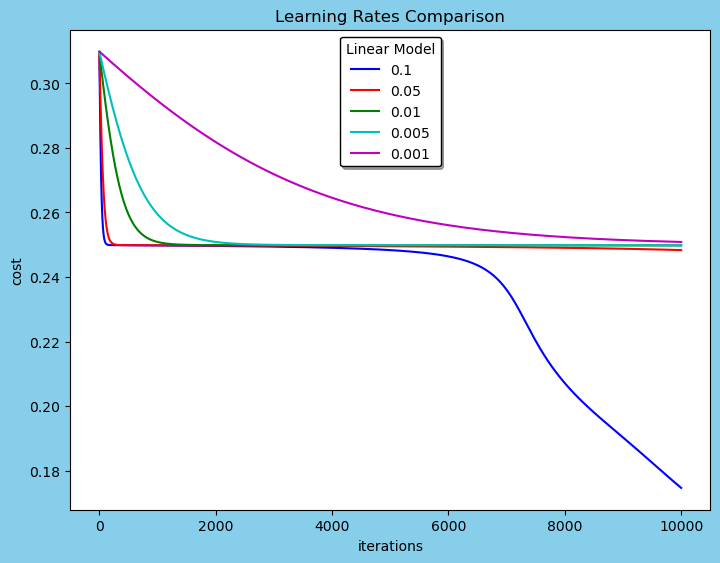

In [70]:
fig=plt.figure(figsize=[6.4, 4.8],facecolor='skyblue', edgecolor='black',dpi=100)
ax = fig.add_axes([0,0,1,1], projection='rectilinear',xlabel='iterations',ylabel='cost',title='Learning Rates Comparison',facecolor='w')
plt.plot(np.arange(10000),J1,color='b')
plt.plot(np.arange(10000),J2,color='r')
plt.plot(np.arange(10000),J3,color='g')
plt.plot(np.arange(10000),J4,color='c')
plt.plot(np.arange(10000),J5,color='m')
plt.legend(['0.1','0.05','0.01','0.005','0.001'],facecolor='w',loc='upper center',shadow=True,edgecolor='black',title='Linear Model')

In [71]:
np.random.seed(200)
df_train, df_test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df))])

In [72]:
df_train['is_safe'].value_counts()

1    743
0    716
Name: is_safe, dtype: int64

In [73]:
df_test['is_safe'].value_counts()

0    196
1    169
Name: is_safe, dtype: int64

In [74]:
X_train = df_train.drop(['is_safe'], axis=1).values
Y_train = df_train['is_safe'].values
X_test = df_test.drop(['is_safe'], axis=1).values
Y_test = df_test['is_safe'].values

In [75]:
alpha = 0.1
iters = 10000
v1_out, v2_out, w1_out, w2_out, J = gradient_descent(X_train, Y_train, v1_tmp, v2_tmp, w1_tmp, w2_tmp, alpha, iters) 
print(f"\nUpdated Parameters:\nv1:{v1_out}\nv2:{v2_out}\nw1:{w1_out}\nw2:{w2_out}")

Iteration    0: Cost 0.3037789055439776   
Iteration 1000: Cost 0.24964408629712206   
Iteration 2000: Cost 0.24948245107007322   
Iteration 3000: Cost 0.24923155472641523   
Iteration 4000: Cost 0.24878760873157138   
Iteration 5000: Cost 0.2478316492411036   
Iteration 6000: Cost 0.24477561344779364   
Iteration 7000: Cost 0.22621166953150915   
Iteration 8000: Cost 0.20203077038250658   
Iteration 9000: Cost 0.18800743739506745   

Updated Parameters:
v1:[-0.25065721 -0.03018035  0.5398886   0.16912924  0.75911211 -0.38608322
  0.04213508  0.40759101  0.0941965   0.09124904  1.15838665  0.74070383
  0.08774217  0.6488805  -0.08134082 -0.1431714  -0.03191951  0.13983171
  0.48849839  0.70626898]
v2:[ 2.368906   -0.01156809 -0.45180145  0.48686913 -1.47422615  1.37217373
  1.31914664 -0.46599013  0.20423815  0.06820448 -0.5845332  -0.24876956
 -0.55752947 -0.34939736 -0.19753644  0.15204711  0.16844719 -0.25620212
  0.13367309 -0.64555621]
w1:-1.9907631720885253
w2:3.4048025002481834


In [78]:
def predict(X):
    v1 = np.array([-0.25065721, -0.03018035,  0.5398886,   0.16912924,  0.75911211, -0.38608322,
  0.04213508,  0.40759101,  0.0941965,   0.09124904,  1.15838665,  0.74070383,
  0.08774217,  0.6488805,  -0.08134082, -0.1431714,  -0.03191951,  0.13983171,
  0.48849839,  0.70626898])
    v2 = np.array([2.368906,   -0.01156809, -0.45180145,  0.48686913, -1.47422615,  1.37217373,
  1.31914664, -0.46599013,  0.20423815,  0.06820448, -0.5845332,  -0.24876956,
 -0.55752947, -0.34939736, -0.19753644,  0.15204711,  0.16844719, -0.25620212,
  0.13367309, -0.64555621])
    w1 = -1.9907631720885253
    w2 = 3.4048025002481834
    preds = []
    for x in X:
        f_w_i = (sigmoid((w1*sigmoid(np.dot(v1,x)))+(w2*sigmoid(np.dot(v2,x)))))
        if (f_w_i >= 0.5):
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [79]:
preds = predict(X_test)

In [80]:
acc = accuracy_score(Y_test, preds)

In [81]:
acc

0.7643835616438356

In [83]:
preds

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
